In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 13}
mpl.rc('font', **font)
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 2

In [3]:
import image_class_new as im
#reload(im)

In [4]:
fits_file = glob.glob('fits/*.fits')
print fits_file

['fits\\HD142666.B6_SPW4_uniform.fits', 'fits\\HD142666_B6_model.uniform.fits', 'fits\\HD142666_B6_model.uniform_residuals.fits', 'fits\\HD142666_B6_model_full.uniform.fits', 'fits\\HD142666_B6_model_full.uniform_residuals.fits', 'fits\\idiskw.thin.w.mu0.5.rd80.tw1100..a0.01.irr.hd142666_480.e0.001.amax2p0_amax1cm.dat.hd142666_480.WL1381.7.fits']


In [ ]:
for i in range(len(fits_file)):
    name = fits_file[i].split('fits\\')[1]
    name = name.split('.')[1]
    print fits_file[i][5:]

In [ ]:
im_obj = im.read_fits('fits/HD142666.band6.cal.time_freq_avg.spw0.r0.5.fits')

In [ ]:
#cmap = 'jet'
#cmap = 'ocean_r'
#cmap ='CMRmap_r'
cmap = 'coolwarm'
#cmap = 'seismic'
#cmap = 'hot'
#cmap = 'Spectral_r'

contours = [2,6,12,18,32]
contours = [6, 13, 19, 26, 32]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
cs = im_obj.plot_one_channel(fig,ax,xlim=1.0,verbose=False,cmap=cmap,\
                             interpolation='bilinear',\
     plot_contour=True,contour_level=contours,c_colors='grey')
im.add_color_bar(fig,ax,cs,xoffset=0.06,aspect=20)

fig.savefig('ALMA_Observation.pdf', bbox_inches='tight')

In [5]:
im_obj = im.read_fits('fits/idiskw.thin.w.mu0.5.rd80.tw1100..a0.01.irr.hd142666_480.e0.001.amax2p0_amax1cm.dat.hd142666_480.WL1381.7.fits')

KeyError: "Keyword 'NAXIS3' not found."

In [ ]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
cs = im_obj.plot_one_channel(fig,ax,xlim=1.0,verbose=False,cmap=cmap,\
                             interpolation='bilinear',\
     plot_contour=True,contour_level=contours,c_colors='grey', vmin = -1.6, vmax = 42)
im.add_color_bar(fig,ax,cs,xoffset=-0.03,aspect=20)

fig.savefig('ALMA_GapDisk.pdf', bbox_inches='tight')

In [ ]:
im_obj = im.read_fits('fits/HD142666.model480_tw1100.fits')

In [ ]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
cs = im_obj.plot_one_channel(fig,ax,xlim=1.0,verbose=False,cmap=cmap,\
                             interpolation='bilinear',\
     plot_contour=True,contour_level=contours,c_colors='grey', vmin = -1.6, vmax = 42)
im.add_color_bar(fig,ax,cs,xoffset=-0.03,aspect=20)

fig.savefig('ALMA_FullDisk.pdf', bbox_inches='tight')

In [ ]:
im_obj = im.read_fits('fits/HD142666.model480_tw400_obs-mod_residual.fits')

In [ ]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
cs = im_obj.plot_one_channel(fig,ax,xlim=1.0,verbose=False,cmap=cmap,\
                             interpolation='bilinear',\
     plot_contour=True,contour_level=[0.4, 0.8, 1.2, 1.6],c_colors='grey', vmin = -1.6, vmax = 42)
im.add_color_bar(fig,ax,cs,xoffset=-0.03,aspect=20)

fig.savefig('Gap_Residual.pdf', bbox_inches='tight')

In [ ]:
fits_file = glob.glob('fits/*.fits')
print fits_file

In [ ]:
fits_file = ['fits/HD142666.band6.cal.time_freq_avg.spw0.r0.5.fits', 'fits/HD142666.model480_tw400_x0.0_y-0.01.fits']

In [ ]:
%load_ext autoreload
%autoreload 2

fig = plt.figure(figsize=(7,7))
nrow,ncol=1,2

#cmap = 'jet'
#cmap = 'ocean_r'
#cmap ='CMRmap_r'
cmap = 'coolwarm'
#cmap = 'seismic'
#cmap = 'hot'
#cmap = 'Spectral_r'

for i in range(len(fits_file)):
    ax = fig.add_subplot(nrow,ncol,i+1)
    im_obj = im.read_fits(fits_file[i])
    name = fits_file[i].split('fits/')[1]
    name = name.split('.')[1]
    
    if i != 2:
        contours = [6, 13, 19, 26, 32]
    else:
        contours = [0.4, 0.8, 1.2, 1.6]
    
    cs = im_obj.plot_one_channel(fig,ax,xlim=1.0,verbose=False,cmap=cmap,interpolation='bilinear', dark_background = True,\
        plot_contour=True,contour_level=contours,c_colors='black', vmin = -1.6, vmax = 37)    
        
    #ax.set_title(name)
    
    if (i != (nrow-1)*ncol):
        ax.text(0.9, 0.8, 'Gapped Disk', color='white')
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels(())
        ax.set_yticklabels(())
    else:
        ax.text(0.9, 0.8, 'Observation', color='white')
        ax.set_xlabel(r'$\Delta\alpha$ [$\prime\prime$]')
        ax.set_ylabel(r'$\Delta\delta$ [$\prime\prime$]')
        
    if i!=1:
        #im.add_color_bar(fig,ax,cs,xoffset=-0.1,aspect=25,ylabel='')
        continue
    else:
        im.add_color_bar(fig,ax,cs,xoffset=0.05,yoffset=0.173,aspect=15,height_no = 0.527,ylabel='mJy beam$^{-1}$')

   

fig.subplots_adjust(wspace=0.0, hspace=0)
fig.savefig('CombinedImages.pdf', bbox_inches='tight')

In [6]:
fits_file = ['', 'fits/HD142666.model480_tw1100.fits', 'fits/HD142666.model480_tw1100_obs-mod_residual.fits', \
             'fits/HD142666.band6.cal.time_freq_avg.spw0.r0.5.fits', 'fits/HD142666.model480_tw400_x0.0_y-0.01.fits', \
             'fits/HD142666.model480_tw400_obs-mod_residual.fits']


fits_file = ['', 'fits/HD142666_B6_model_full.uniform.fits','fits/HD142666_B6_model_full.uniform_residuals.fits', \
    'fits/HD142666.B6_SPW4_uniform.fits', \
    'fits/HD142666_B6_model.uniform.fits',\
    'fits/HD142666_B6_model.uniform_residuals.fits']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
fits/HD142666_B6_model_full.uniform.fits
fits/HD142666_B6_model_full.uniform_residuals.fits
fits/HD142666.B6_SPW4_uniform.fits
fits/HD142666_B6_model.uniform.fits
fits/HD142666_B6_model.uniform_residuals.fits


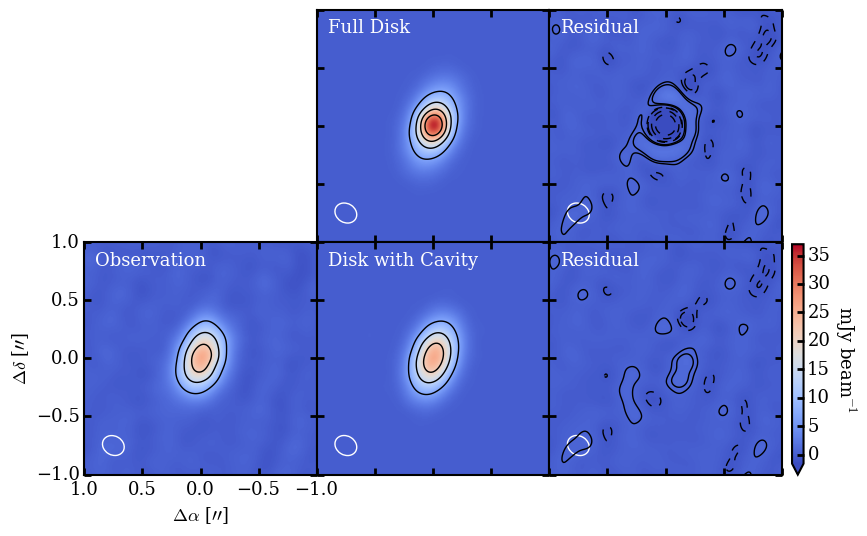

In [7]:
%load_ext autoreload
%autoreload 2

fig = plt.figure(figsize=(9,6))
nrow,ncol=2,3

rms = 1.7e-4 * 1000 #The sigma for the image

#cmap = 'jet'
#cmap = 'ocean_r'
#cmap ='CMRmap_r'
cmap = 'coolwarm'
#cmap = 'seismic'
#cmap = 'hot'
#cmap = 'Spectral_r'

for i in range(len(fits_file)):
    if fits_file[i] == '':
        continue
        
    ax = fig.add_subplot(nrow,ncol,i+1)
    print fits_file[i]
    im_obj = im.read_fits(fits_file[i])
        
    name = fits_file[i].split('fits/')[1]
    name = name.split('.')[1]
    
    #print im_obj.calculate_rms()
    
    if i != 2 and i != 5:
        contours = np.array([0.2, 0.4, 0.6, 0.8])*35
        #contours = np.array([-5, 5, 7, 9]) * rms
    else:
        contours = np.array([-30, -15, -5, -3, 3, 5, 15, 30]) * rms
        
    cs = im_obj.plot_one_channel(fig,ax,xlim=1.0,verbose=False,cmap=cmap,interpolation='bilinear', dark_background = True,\
        plot_contour=True,contour_level=contours,c_colors='black', vmin = -1.6, vmax = 37)    

    #ax.set_title(name)
    
    #if (i != (nrow-1)*ncol):
    if i != 3:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticklabels(())
        ax.set_yticklabels(())
    else:
        ax.set_xlabel(r'$\Delta\alpha$ [$\prime\prime$]')
        ax.set_ylabel(r'$\Delta\delta$ [$\prime\prime$]')
        
    if i == 3:
        ax.text(0.9, 0.8, 'Observation', color='white')
    if i == 1:
        ax.text(0.9, 0.8, 'Full Disk', color='white')
    if i == 2:
        ax.text(0.9, 0.8, 'Residual', color='white')
    if i == 4:
        ax.text(0.9, 0.8, 'Disk with Cavity', color='white')
    if i == 5:
        ax.text(0.9, 0.8, 'Residual', color='white')
        
        
    if i!=5:
        #im.add_color_bar(fig,ax,cs,xoffset=-0.1,aspect=25,ylabel='')
        continue
    else:
        im.add_color_bar(fig,ax,cs,xoffset=0.05,yoffset=0,aspect=30,height_no = 1.09,ylabel='mJy beam$^{-1}$')

fig.subplots_adjust(wspace=0.0, hspace=0.0)
fig.savefig('CombinedImages_Resid.pdf', bbox_inches='tight')

#https://matplotlib.org/examples/pylab_examples/scatter_hist.html used for specifying plot dims